In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import leastsq,curve_fit

In [2]:
def sin(t,amp,freq,phase,offset):
    res = (amp*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def decaying_sin(t,tau,amp,freq,phase,offset):
    res = (amp*np.exp(-t/tau)*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def est_freq(ydata,tgap,tau,amp,freq,phase,offset): # Estimation of frequency change (from dy/df where y=sinusoidal fit)
    res=(ydata-decaying_sin(tau,tgap,amp,freq,phase,offset))/(amp*np.exp(-tgap/tau)*2*np.pi*tgap*np.cos(2*np.pi*freq*tgap+phase))
    return res

def gaussian(x,amp,x0,sigma,offset):
    res=(amp*np.exp((-(x-x0)**2)/(sigma**2)))+offset
    return res

def make_plots(QDP,retention):
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    fig, ax = plt.subplots()
    for roi in [1,2]:
        error=0
        data = []
        reten = []
        err = []
        for e in range(len(np.squeeze(retention['ivar']))):
            data.append(np.squeeze(retention['ivar'])[e][roi])
            reten.append(np.squeeze(retention['retention'])[e][roi])
            err.append(np.squeeze(retention['error'])[e][roi])
        if QDP.experiments[0]['variable_list']==[]:
            data=range(0,np.size(retention['ivar'],axis=1))
            xlab = 'iteration'
        else:
            xlab = QDP.experiments[0]['variable_desc'][QDP.experiments[0]['variable_list'][0]]['description']
        ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    plt.show()
    ax.set_ylim(0, 1)
    ax.set_xlabel(xlab)
    ax.set_ylabel('retention')
    ax.set_title(exp_id)
    ax.grid()
    ax.legend()

# Set the experiment to analyze


In [3]:
#analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
exp_id='2018_02_28_01_16_45_gain 3, Closed loop, fixed tgap, fixed 1000 measurement Ramsey'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
q.get_thresholds()
retention = q.apply_thresholds()

C:\Users\Rb\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Rb\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


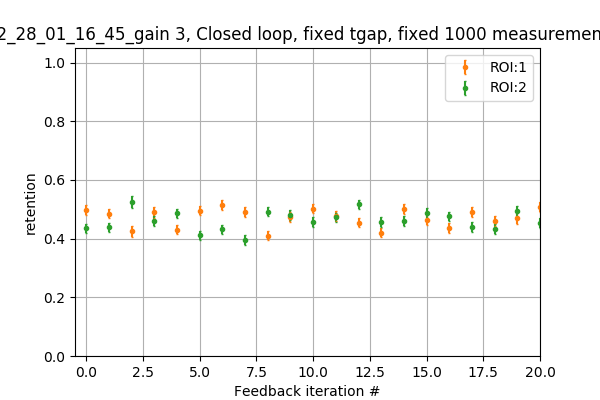

In [25]:
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots()
fig.set_size_inches(6,4)
fit_guesses=[30,0.4,2,0,0.5]
roi_dependency=[0,0,0,0,0]
fitted_parameters=[]
for roi in [1,2]:
    error=0
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
    ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',markersize=3,color=colors[roi],capsize=1)
#     guesses=np.add(fit_guesses,np.ones(len(fit_guesses))*(roi-2)*roi_dependency)
#     try:
#         fit,pcov = curve_fit(decaying_sin,data,reten,guesses)
#     except RuntimeError:
#         error=1
#     if error is not 1:
#         print "ROI:{}, tau : {}, amplitude {} , freq:{}, phase:{}, offset:{}".format(roi,fit[0],fit[1],fit[2],fit[3],fit[4])
#         fitted_parameters.append(fit[0])
#         xarray=np.linspace(np.min(data),np.max(data),100)
#         yfit=decaying_sin(xarray, fit[0],fit[1],fit[2],fit[3],fit[4])
#         plt.plot(xarray,yfit,label="ROI:{}".format(roi),color=colors[roi])

plt.show()
ax.set_title(exp_id)
ax.set_ylim(0, 1.05)
ax.set_xlim(-0.5,20)
ax.grid()
#ax.set_xlabel(xlab)
ax.set_xlabel('Feedback iteration #')
ax.set_ylabel('retention')
ax.legend()
fig.savefig(exp_id+'atom_Retention.pdf')
fig.savefig(exp_id+'atom_Retention.png')

# Camera plots, red

<IPython.core.display.Javascript object>


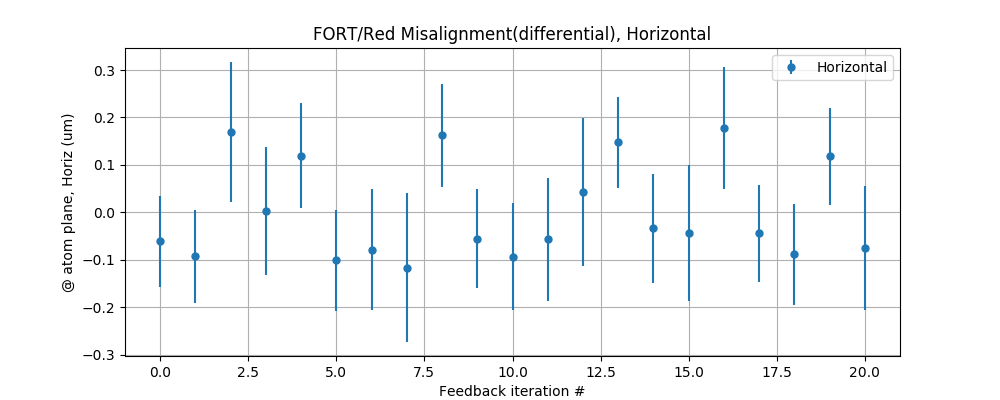

<IPython.core.display.Javascript object>


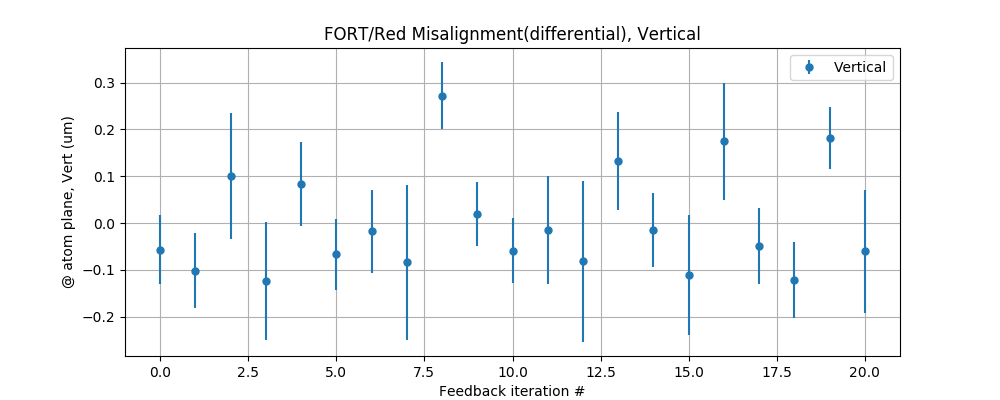

<IPython.core.display.Javascript object>


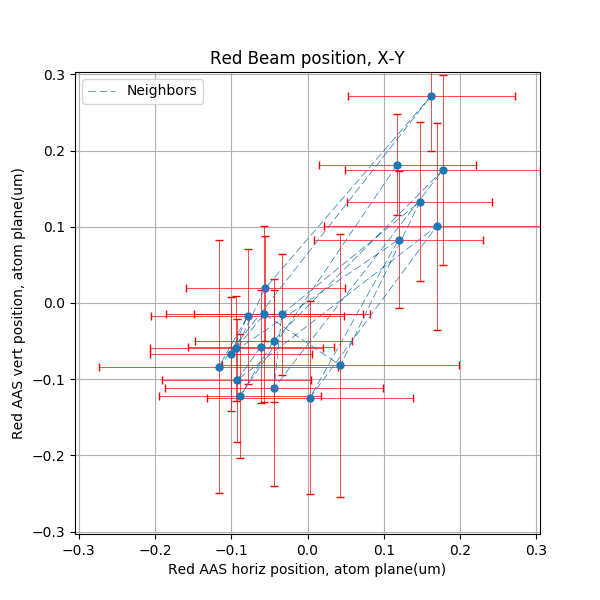

In [26]:
whichside='AAS_redside' #'AAS_
#whichside='AAS_redside'
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
xdata = []
ydata = []
yerr = []
for e in range(len(np.squeeze(retention['ivar']))):
    xdata.append(np.squeeze(retention['ivar'])[e][2])
    ydata.append(q.experiments[0]['iterations'][e][whichside]['x'])
    yerr.append(q.experiments[0]['iterations'][e][whichside]['sigma_x'])
offset=np.mean(Xcoord)
Xcoord=ydata-offset
Xcoord_err=yerr
ax.errorbar(xdata,Xcoord,yerr=yerr,fmt='o',markersize=5,label='Horizontal')

plt.show()
#ax.set_title(exp_id)
ax.set_title('FORT/Red Misalignment(differential), Horizontal')
#ax.set_xlim(0,130)
#ax.set_ylim(-10, 10)
ax.set_xlabel(xlab)
ax.set_ylabel('@ atom plane, Horiz (um)')
ax.grid()
ax.legend()
ax.set_xlabel('Feedback iteration #')
fig.savefig(exp_id+'Camera_X.pdf')
fig.savefig(exp_id+'Camera_X.png')

fig, ax = plt.subplots()
fig.set_size_inches(10,4)
xdata = []
ydata = []
yerr = []
for e in range(len(np.squeeze(retention['ivar']))):
    xdata.append(np.squeeze(retention['ivar'])[e][2])
    ydata.append(q.experiments[0]['iterations'][e][whichside]['y'])
    yerr.append(q.experiments[0]['iterations'][e][whichside]['sigma_y'])
offset=np.mean(Ycoord)
Ycoord=ydata-offset
Ycoord_err=yerr
ax.set_title('FORT/Red Misalignment(differential), Vertical')
ax.errorbar(xdata,Ycoord,yerr=yerr,fmt='o',markersize=5,label='Vertical')

#ax.set_title(exp_id)
#ax.set_xlim(0,130)
#ax.set_ylim(11.6, 13)
ax.set_xlabel(xlab)
ax.set_ylabel('@ atom plane, Vert (um)')
ax.grid()
ax.legend()
ax.set_xlabel('Feedback iteration #')
fig.savefig(exp_id+'Camera_Y.pdf')
fig.savefig(exp_id+'Camera_Y.png')

fig, ax = plt.subplots()
fig.set_size_inches(6,6)
length_conversion=1.0 # Red gives already in um units
cutoff=-1
xdata=length_conversion*(Xcoord[0:cutoff]-np.nanmean(Xcoord))
xerr=length_conversion*np.array(Xcoord_err[0:cutoff])
ydata=length_conversion*(Ycoord[0:cutoff]-np.nanmean(Ycoord))
yerr=length_conversion*np.array(Ycoord_err[0:cutoff])
ax.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,fmt='o',ecolor='red',elinewidth=0.5,markersize=5,capsize=3)
ax.plot(xdata,ydata,'--',linewidth=0.5,label='Neighbors')

ax.set_title('Red Beam position, X-Y')
ax.set_xlim(-0.305,0.305)
ax.set_ylim(-0.3, 0.3)
ax.set_xlabel('Red AAS horiz position, atom plane(um)')
ax.set_ylabel('Red AAS vert position, atom plane(um)')
ax.set_aspect('equal', 'datalim')
ax.grid()
ax.legend()
fig.savefig(exp_id+'Camera Beam history.pdf')
fig.savefig(exp_id+'Camera Beam history.png')

# Actuator plot

<IPython.core.display.Javascript object>


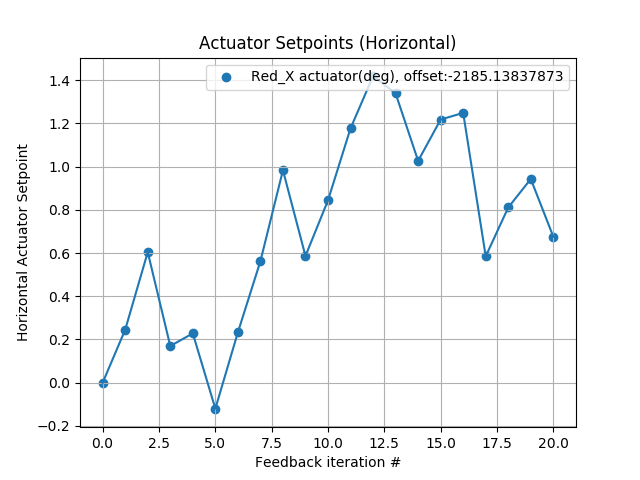

<IPython.core.display.Javascript object>


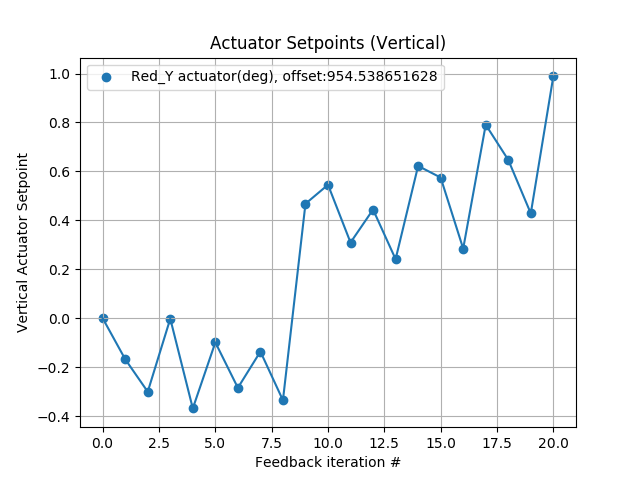

<IPython.core.display.Javascript object>


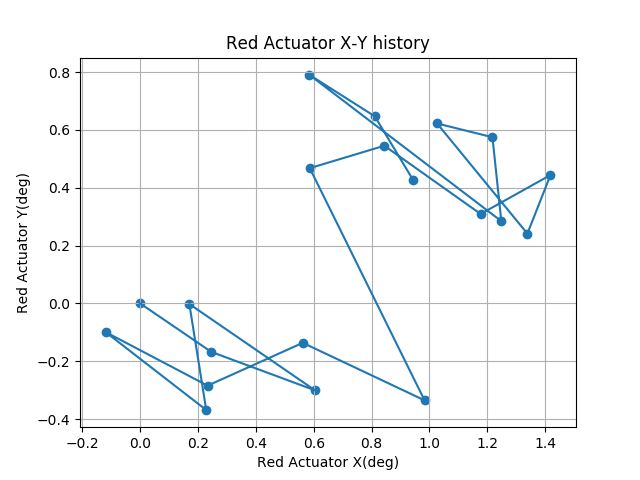

In [27]:
## X actuator plot
fig, ax = plt.subplots()
xdata = []
ydata = []
for e in range(len(np.squeeze(retention['ivar']))):
    xdata.append(np.squeeze(retention['ivar'])[e][2])
    ydata.append(q.experiments[0]['iterations'][e]['variables']['Red_X'])
offset=ydata[0]#np.median(ydata)
Xactuator=ydata-offset
ax.scatter(xdata,Xactuator,label='Red_X actuator(deg), offset:{}'.format(offset))
ax.plot(xdata,Xactuator)
#ax.set_title(exp_id)
ax.set_title('Actuator Setpoints (Horizontal)')
#ax.set_xlim(0,130)
#ax.set_ylim(-10, 10)
ax.set_xlabel('Feedback iteration #')
ax.set_ylabel('Horizontal Actuator Setpoint')
ax.grid()
ax.legend()
plt.show()
fig.savefig(exp_id+'actuatorX.pdf')
fig.savefig(exp_id+'actuatorX.png')

## Y actuator plot
fig, ax = plt.subplots()
xdata = []
ydata = []
for e in range(len(np.squeeze(retention['ivar']))):
    xdata.append(np.squeeze(retention['ivar'])[e][2])
    ydata.append(q.experiments[0]['iterations'][e]['variables']['Red_Y'])
offset=ydata[0]
Yactuator=ydata-offset
ax.scatter(xdata,Yactuator,label='Red_Y actuator(deg), offset:{}'.format(offset))
ax.plot(xdata,Yactuator)


#ax.set_title(exp_id)
ax.set_title('Actuator Setpoints (Vertical)')
#ax.set_xlim(0,130)
#ax.set_ylim(11.6, 13)
ax.set_xlabel('Feedback iteration #')
ax.set_ylabel('Vertical Actuator Setpoint')
ax.grid()
ax.legend()
fig.savefig(exp_id+'actuatorY.pdf')
fig.savefig(exp_id+'actuatorY.png')
##
fig, ax = plt.subplots()
length_conversion=1.0 # Red gives already in um units
cutoff=-1
xdata=Xactuator[0:cutoff]
ydata=Yactuator[0:cutoff]
ax.plot(xdata,ydata)
ax.scatter(xdata,ydata)
ax.set_title('Red Actuator X-Y history')
#ax.set_xlim(-1,1)
#ax.set_ylim(-1, 1)
ax.set_xlabel('Red Actuator X(deg)')
ax.set_ylabel('Red Actuator Y(deg)')
ax.set_aspect('equal', 'datalim')
ax.grid()
ax.legend()
fig.savefig(exp_id+'actuatorXY.pdf')
fig.savefig(exp_id+'actuatorXY.png')

<IPython.core.display.Javascript object>


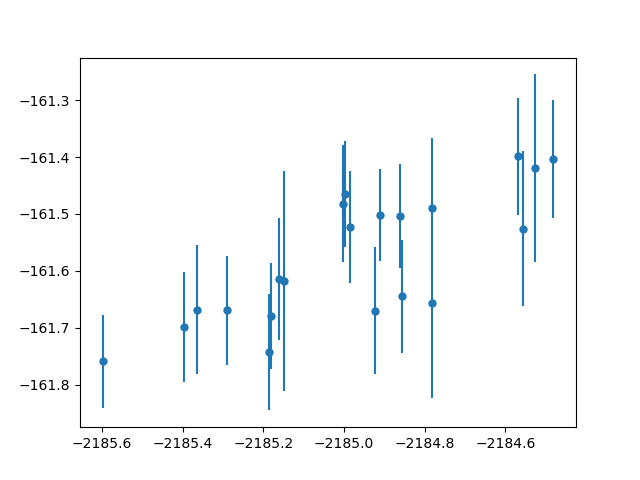

<IPython.core.display.Javascript object>


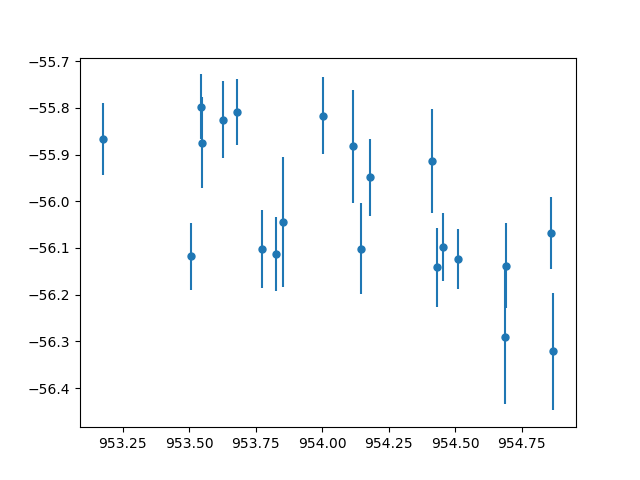

<Container object of 3 artists>

In [23]:
fig, ax = plt.subplots()
ax.errorbar(Xactuator,Xcoord,yerr=Xcoord_err,fmt='o',markersize=5)
fig, ax = plt.subplots()
ax.errorbar(Yactuator,Ycoord,yerr=Ycoord_err,fmt='o',markersize=5)

<IPython.core.display.Javascript object>

AttributeError: Unknown property fmt